# DAwPy_Preclass_7&8&9

- apply() : Apply a function along an axis of the DataFrame. Series in given axis are passed to the function.
    * Row or Column Wise Function Application: apply()
    * Element wise Function Application: applymap()
    * Function application on Series : map()
Dealing with unique values in a column using; 
- unique() :Compute array of unique values in a Series, returned in the order observed
- nunique(): gives the number of unique values
- value_counts() :Return a Series containing unique values as its index and frequencies as its values, ordered count in descending order
- sort_values() method Sorting a DataFrame by a column. It accepts a 'by' argument with column name.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [6]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df["sex_num"] = df.sex.map({"Female":0, "Male":1})

In [5]:
df.loc[:4,["sex","sex_num"]]

,sex,sex_num
0,Male,1.0
1,Female,0.0
2,Female,0.0
3,NaN,NaN
4,Female,0.0


In [10]:
df["species_length"] = df["species"].apply(len)

In [11]:
df.species.nunique()

3

In [12]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [13]:
df.loc[::170, ["species","species_length"]]

,species,species_length
0,Adelie,6
170,Chinstrap,9
340,Gentoo,6


In [14]:
df["bill_depth_mm_ceil"] = df.bill_depth_mm.apply(np.ceil)  # ust tarafa yuvarlar , round dan farki yakina degil hep uste yuvarlar

In [15]:
df.loc[:4, ["bill_depth_mm_ceil", "bill_depth_mm"]] 

,bill_depth_mm_ceil,bill_depth_mm
0,19.0,18.7
1,18.0,17.4
2,18.0,18.0
3,NaN,NaN
4,20.0,19.3


In [19]:
#df["bill_depth_mm_round"] = df.bill_depth_mm.apply(round)  # apply srileri kullandigi icin calismaz. 
                                                            # Her hucrede tektek islem yapan transform kullanilmali
df["bill_depth_mm_round"] = df.bill_depth_mm.transform(round)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,sex_num,species_length,bill_depth_mm_ceil,bill_depth_mm_round
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,6,19.0,19.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.0,6,18.0,17.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.0,6,18.0,18.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0.0,6,20.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0,6,15.0,14.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1.0,6,16.0,16.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0.0,6,15.0,15.0


# apply komutuna fonksiyon göndermek

In [21]:
hotels = pd.read_csv("hotel_booking_data.csv") 

In [22]:
hotels.name

0              Ernest Barnes
1               Andrea Baker
2             Rebecca Parker
3               Laura Murray
4                Linda Hines
                 ...        
119385       Claudia Johnson
119386        Wesley Aguilar
119387          Mary Morales
119388    Caroline Conley MD
119389        Ariana Michael
Name: name, Length: 119390, dtype: object

In [36]:
hotels.name.str.split().head()

0     [Ernest, Barnes]
1      [Andrea, Baker]
2    [Rebecca, Parker]
3      [Laura, Murray]
4       [Linda, Hines]
Name: name, dtype: object

In [37]:
hotels.name.str.split().head().str[-1].value_counts().head()

Baker     1
Barnes    1
Hines     1
Parker    1
Murray    1
Name: name, dtype: int64

In [27]:
def get_surnames(lst, position):
    return lst[position]

In [34]:
hotels.name.str.split(" ").apply(get_surnames, position = -1)

0          Barnes
1           Baker
2          Parker
3          Murray
4           Hines
           ...   
119385    Johnson
119386    Aguilar
119387    Morales
119388         MD
119389    Michael
Name: name, Length: 119390, dtype: object

# apply komutuna lambda gönderme

In [29]:
hotels.name.str.split(" ").apply(lambda x : x[-1])

0          Barnes
1           Baker
2          Parker
3          Murray
4           Hines
           ...   
119385    Johnson
119386    Aguilar
119387    Morales
119388         MD
119389    Michael
Name: name, Length: 119390, dtype: object

# apply komutunda axis kullanımı

In [38]:
df1 = sns.load_dataset("penguins")
df1.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [39]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ].head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0


In [40]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ].apply(max, axis=0)

bill_length_mm        59.6
bill_depth_mm         21.5
flipper_length_mm    231.0
dtype: float64

In [41]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ].apply(max, axis=1).head(3)

0    181.0
1    186.0
2    195.0
dtype: float64

In [42]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ].apply(np.argmax, axis=1)

0      2
1      2
2      2
3     -1
4      2
      ..
339   -1
340    2
341    2
342    2
343    2
Length: 344, dtype: int64

In [43]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ]  #NaN'lara dikkat

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
3,NaN,NaN,NaN
4,36.7,19.3,193.0
...,...,...,...
339,NaN,NaN,NaN
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


# applymap()
Dataframe'deki her elemana fonksiyonu birer birer tatbik eder.

In [44]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
dtypes: float64(3)
memory usage: 8.2 KB


In [45]:
df1.loc[:,"bill_length_mm" : "flipper_length_mm" ].applymap(str).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bill_length_mm     344 non-null    object
 1   bill_depth_mm      344 non-null    object
 2   flipper_length_mm  344 non-null    object
dtypes: object(3)
memory usage: 8.2+ KB


# Handling Missing Values in Pandas Dataframe

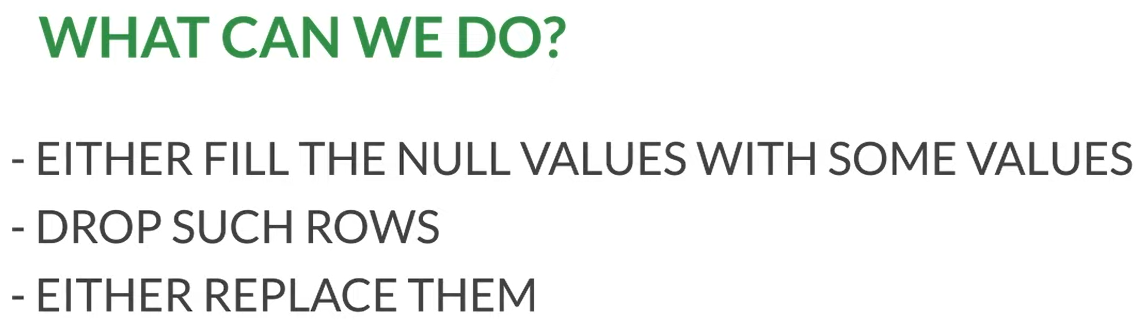

In [46]:
df1.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [47]:
df1.isnull().sum()  #her sutundaki null degerlerin toplamini verir

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [48]:
df1.isnull().sum().sum()  # DF'teki toplan null sayisini verir

19

# filling Null values

In [50]:
df2= df1.fillna(value=0)  # null'larin yerini 0 ile doldurur
df2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,0.0,0.0,0.0,0.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.0,0.0,0.0,0.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [51]:
df2.isnull().sum().sum()

0

## yakın değer ile doldurma

- Yakın değer ile doldurma .fillna(method=   )
    * 'backfill' ==> 
    * 'bfill'    ==> filling next value #(axis=1) olursa SAĞINDAKİ değer ile doldurur.
    * 'pad'      ==> filling previous value #(axis=1) olursa SOLUNDAKİ değer ile doldurur.
    * 'ffill'    ==> 

- Ayrı sütunlara değer atama:
   fillna({"colomn1" : value1 , "colomn2" : value2})

In [54]:
df3= df1.fillna(method="pad", axis=0)  # pad metodu 
df3

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [55]:
df4= df1.fillna(method="pad", axis=1)
df4

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen,Torgersen
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe,Biscoe
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [56]:
df5= df1.fillna(method="bfill", axis=0)
df5.tail(6)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
339,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [57]:
df6= df1.fillna(method="bfill", axis=1)
df6

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## mean(), max(),min() ile doldurma
- fillna(value=df["colomn"].mean())
- fillna(value=df["colomn"].max())
- fillna(value=df["colomn"].min())

In [58]:
df7= df1.fillna(value=df1["bill_length_mm"].mean())
df7

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.00000,3750.00000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.00000,3800.00000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.00000,3250.00000,Female
3,Adelie,Torgersen,43.92193,43.92193,43.92193,43.92193,43.92193
4,Adelie,Torgersen,36.70000,19.30000,193.00000,3450.00000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,43.92193,43.92193,43.92193,43.92193
340,Gentoo,Biscoe,46.80000,14.30000,215.00000,4850.00000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.00000,5750.00000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.00000,5200.00000,Female


In [59]:
df8= df1.fillna(value=df1["bill_length_mm"].max())
df8

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,59.6,59.6,59.6,59.6,59.6
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,59.6,59.6,59.6,59.6,59.6
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# dropna()
- dropna(how = "all") hepsi null olanları düşürür.
- dropna(how = "any") 1 tane dahi null var ise düşürür.

In [60]:
df9 = df1.dropna(how="all")
df9

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [61]:
df10 = df1.dropna(how="any")
df10

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## replace()
- df.replace(to_replace=np.nan , value = xxx) # null değerleri değiştirme
- df.replace(to_replace=yyy , value = zzz) # herhangi bir değerleri değiştirme

In [62]:
df11 = df1.replace(to_replace=np.nan , value = "bu satır boş")
df11

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,bu satır boş,bu satır boş,bu satır boş,bu satır boş,bu satır boş
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,bu satır boş,bu satır boş,bu satır boş,bu satır boş,bu satır boş
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## interpolate()
- df.interpolate(method = "linear", limit_direction = ["both","forward","backward"]) 

In [63]:
df12 = df1.interpolate(method = "linear")
df12

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.70,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.40,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.00,195.0,3250.0,Female
3,Adelie,Torgersen,38.5,18.65,194.0,3350.0,NaN
4,Adelie,Torgersen,36.7,19.30,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.0,14.00,214.5,4887.5,NaN
340,Gentoo,Biscoe,46.8,14.30,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.70,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.80,212.0,5200.0,Female


In [64]:
df13 = df1
df13.iloc[2,2] = np.nan
df13

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,NaN,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [65]:
df14 = df13.interpolate(method = "ffill")
df14

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,39.5,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,39.5,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# Outliers

In [66]:
dfd = sns.load_dataset("diamonds")
dfd

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [67]:
xx = dfd.carat
xx

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [68]:
xx.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [69]:
Q1 = xx.quantile(0.25)
Q3 = xx.quantile(0.75)
IQR = round((Q3 - Q1),1)
# IQR = Q3 -Q1
print(Q1, Q3, IQR)

0.4 1.04 0.6


In [70]:
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

(-0.4999999999999999, 1.94)

In [71]:
outliers= xx[(xx<lower_lim) | (xx>upper_lim)]
outliers

11604    1.95
11634    2.00
12246    2.06
13002    2.14
13118    2.15
         ... 
27744    2.29
27745    2.00
27746    2.07
27748    2.00
27749    2.29
Name: carat, Length: 2173, dtype: float64

In [72]:
no_outliers = xx[~((xx<lower_lim) | (xx>upper_lim))]
no_outliers

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 51767, dtype: float64

In [73]:
no_outliers2 = xx[(xx>=lower_lim) & (xx<=upper_lim)]
no_outliers2

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 51767, dtype: float64